# Estatística descritiva - Avaliação Completa

Neste notebook, iremos carregar os dados, realizar análise estatística e geração dos principais gráficos de avaliação.

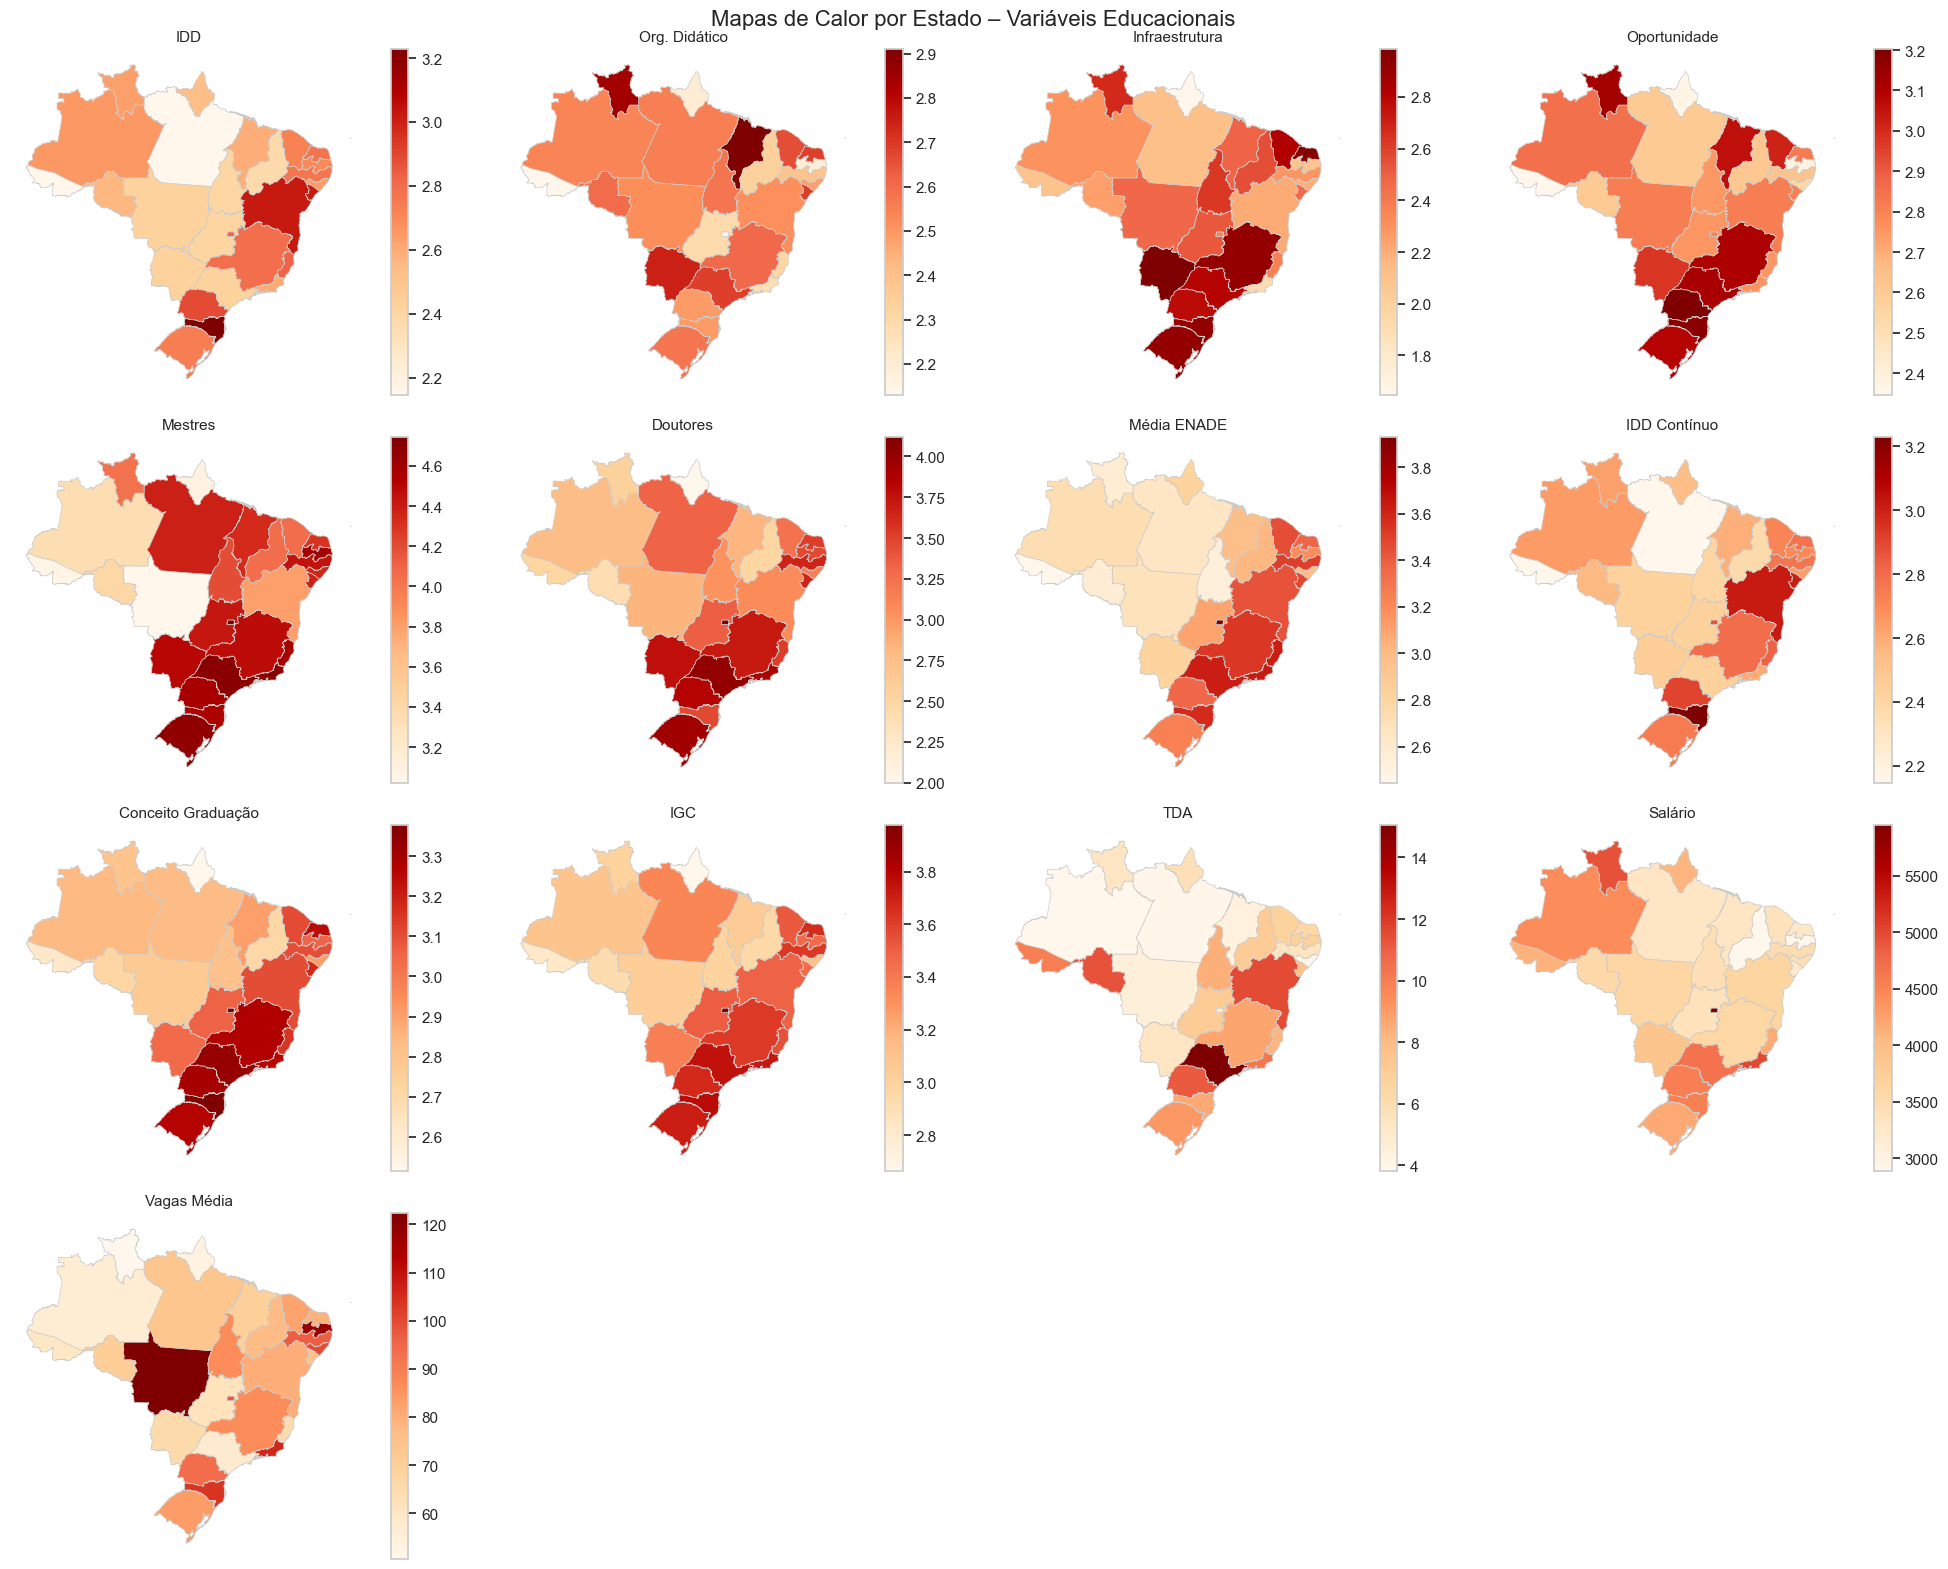

In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 📁 Caminho do shapefile local
caminho_geo = r'C:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\data\processed\brazil_states.geojson'
gdf_brasil = gpd.read_file(caminho_geo)

# 📍 Mapeia nomes dos estados para siglas (UF)
siglas_estados = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
gdf_brasil['UF'] = gdf_brasil['name'].map(siglas_estados)

# 🎯 Lista de variáveis a serem mapeadas
variaveis = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'TDA',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

# 🏷️ Nomes curtos para o título dos gráficos
nomes_curto = {
    'NOTA_PADRONIZADA_-_IDD': 'IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA': 'Org. Didático',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS': 'Infraestrutura',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO': 'Oportunidade',
    'NOTA_PADRONIZADA_-_MESTRES': 'Mestres',
    'NOTA_PADRONIZADA_-_DOUTORES': 'Doutores',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)': 'Média ENADE',
    'IDD_(CONTÍNUO)': 'IDD Contínuo',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO': 'Conceito Graduação',
    'IGC_(CONTÍNUO)': 'IGC',
    'TDA': 'TDA',
    'SALARIO': 'Salário',
    'QT_VG_TOTAL_MEDIA': 'Vagas Média'
}

# 📊 Média das variáveis por estado
df['SIGLA_DA_UF'] = df['SIGLA_DA_UF'].str.upper()
media_por_estado = df.groupby('SIGLA_DA_UF')[variaveis].mean().reset_index()

# 🔗 Juntar com o mapa
gdf_merged = gdf_brasil.merge(media_por_estado, left_on='UF', right_on='SIGLA_DA_UF', how='left')

# 🔢 Definir número de linhas e colunas do grid de mapas
import math
n = len(variaveis)
ncols = 4
nrows = math.ceil(n / ncols)

# 🖼️ Criar grid de subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axs = axs.flatten()

for i, var in enumerate(variaveis):
    gdf_merged.plot(
        column=var,
        cmap='OrRd',
        linewidth=0.5,
        ax=axs[i],
        edgecolor='0.8',
        legend=True
    )
    axs[i].set_title(f'{nomes_curto.get(var, var)}', fontsize=11)
    axs[i].axis('off')

# Remover eixos extras se sobrarem
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle('Mapas de Calor por Estado – Variáveis Educacionais', fontsize=16)
plt.tight_layout()
plt.show()



### Estatísticas Descritivas Atualizada ###


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Coeficiente de Variação
NOTA_PADRONIZADA_-_IDD,2.686974,2.665456,0.708318,0.020000,5.000000,0.263612
NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA,2.513250,2.518189,0.769656,0.000000,4.764000,0.306239
NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS,2.577177,2.640500,0.826416,0.000000,4.806500,0.320667
NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO,2.900473,2.934000,0.657698,0.000000,4.801000,0.226756
NOTA_PADRONIZADA_-_MESTRES,4.353912,4.637750,0.812271,0.000000,5.000000,0.186561
NOTA_PADRONIZADA_-_DOUTORES,3.509263,3.819500,1.105402,0.000000,5.000000,0.314995
MEDIA_CONCEITO_ENADE_(CONTÍNUO),3.288015,3.348824,0.832425,0.187888,5.000000,0.253169
IDD_(CONTÍNUO),2.691831,2.670351,0.702290,0.021000,5.000000,0.260897
CONCEITO_MÉDIO_DE_GRADUAÇÃO,3.132286,3.175627,0.277828,2.242833,4.181189,0.088698
IGC_(CONTÍNUO),3.512894,3.529067,0.458907,2.284978,4.471158,0.130635


### Matriz de Correlação (Pearson) ###


,NOTA_PADRONIZADA_-_IDD,NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA,NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS,NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO,NOTA_PADRONIZADA_-_MESTRES,NOTA_PADRONIZADA_-_DOUTORES,MEDIA_CONCEITO_ENADE_(CONTÍNUO),IDD_(CONTÍNUO),CONCEITO_MÉDIO_DE_GRADUAÇÃO,IGC_(CONTÍNUO),TDA,SALARIO,QT_VG_TOTAL_MEDIA
NOTA_PADRONIZADA_-_IDD,1.000000,0.123684,0.146072,0.186829,0.077338,0.098146,0.545648,0.992764,0.260531,0.184989,-0.037513,0.027242,-0.013960
NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA,0.123684,1.000000,0.746640,0.662357,-0.113450,-0.241842,-0.112396,0.117646,-0.115768,-0.250062,0.156997,-0.176817,-0.162136
NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS,0.146072,0.746640,1.000000,0.701039,-0.031086,-0.114144,-0.039660,0.144004,0.073854,-0.101730,0.167587,-0.142587,-0.090525
NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO,0.186829,0.662357,0.701039,1.000000,0.049991,-0.026499,0.099143,0.185916,0.169246,0.018629,0.113052,-0.001741,-0.061964
NOTA_PADRONIZADA_-_MESTRES,0.077338,-0.113450,-0.031086,0.049991,1.000000,0.658061,0.322763,0.081107,0.526433,0.500868,-0.090511,0.075986,0.049242
NOTA_PADRONIZADA_-_DOUTORES,0.098146,-0.241842,-0.114144,-0.026499,0.658061,1.000000,0.357661,0.105047,0.624088,0.684672,-0.168647,0.128234,0.152654
MEDIA_CONCEITO_ENADE_(CONTÍNUO),0.545648,-0.112396,-0.039660,0.099143,0.322763,0.357661,1.000000,0.551731,0.529430,0.538885,-0.144910,0.236414,0.062595
IDD_(CONTÍNUO),0.992764,0.117646,0.144004,0.185916,0.081107,0.105047,0.551731,1.000000,0.267584,0.192255,-0.040826,0.033350,-0.016473
CONCEITO_MÉDIO_DE_GRADUAÇÃO,0.260531,-0.115768,0.073854,0.169246,0.526433,0.624088,0.529430,0.267584,1.000000,0.885048,-0.075450,0.228527,0.096360
IGC_(CONTÍNUO),0.184989,-0.250062,-0.101730,0.018629,0.500868,0.684672,0.538885,0.192255,0.885048,1.000000,-0.206237,0.267881,0.186605


### Ranking TDA por IES ###


,TDA
NOME_DA_IES,
"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO TRIÂNGULO MINEIRO",26.486066
"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SÃO PAULO",24.130114
"Instituto Federal de Educação, Ciência e Tecnologia do Acre",22.632307
"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA BAIANO",22.190301
"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO DO SUL",21.091077
...,...
FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC,0.891756
UNIVERSIDADE FEDERAL DO PARÁ,0.775032
INSTITUTO TECNOLÓGICO DE AERONÁUTICA,0.450450


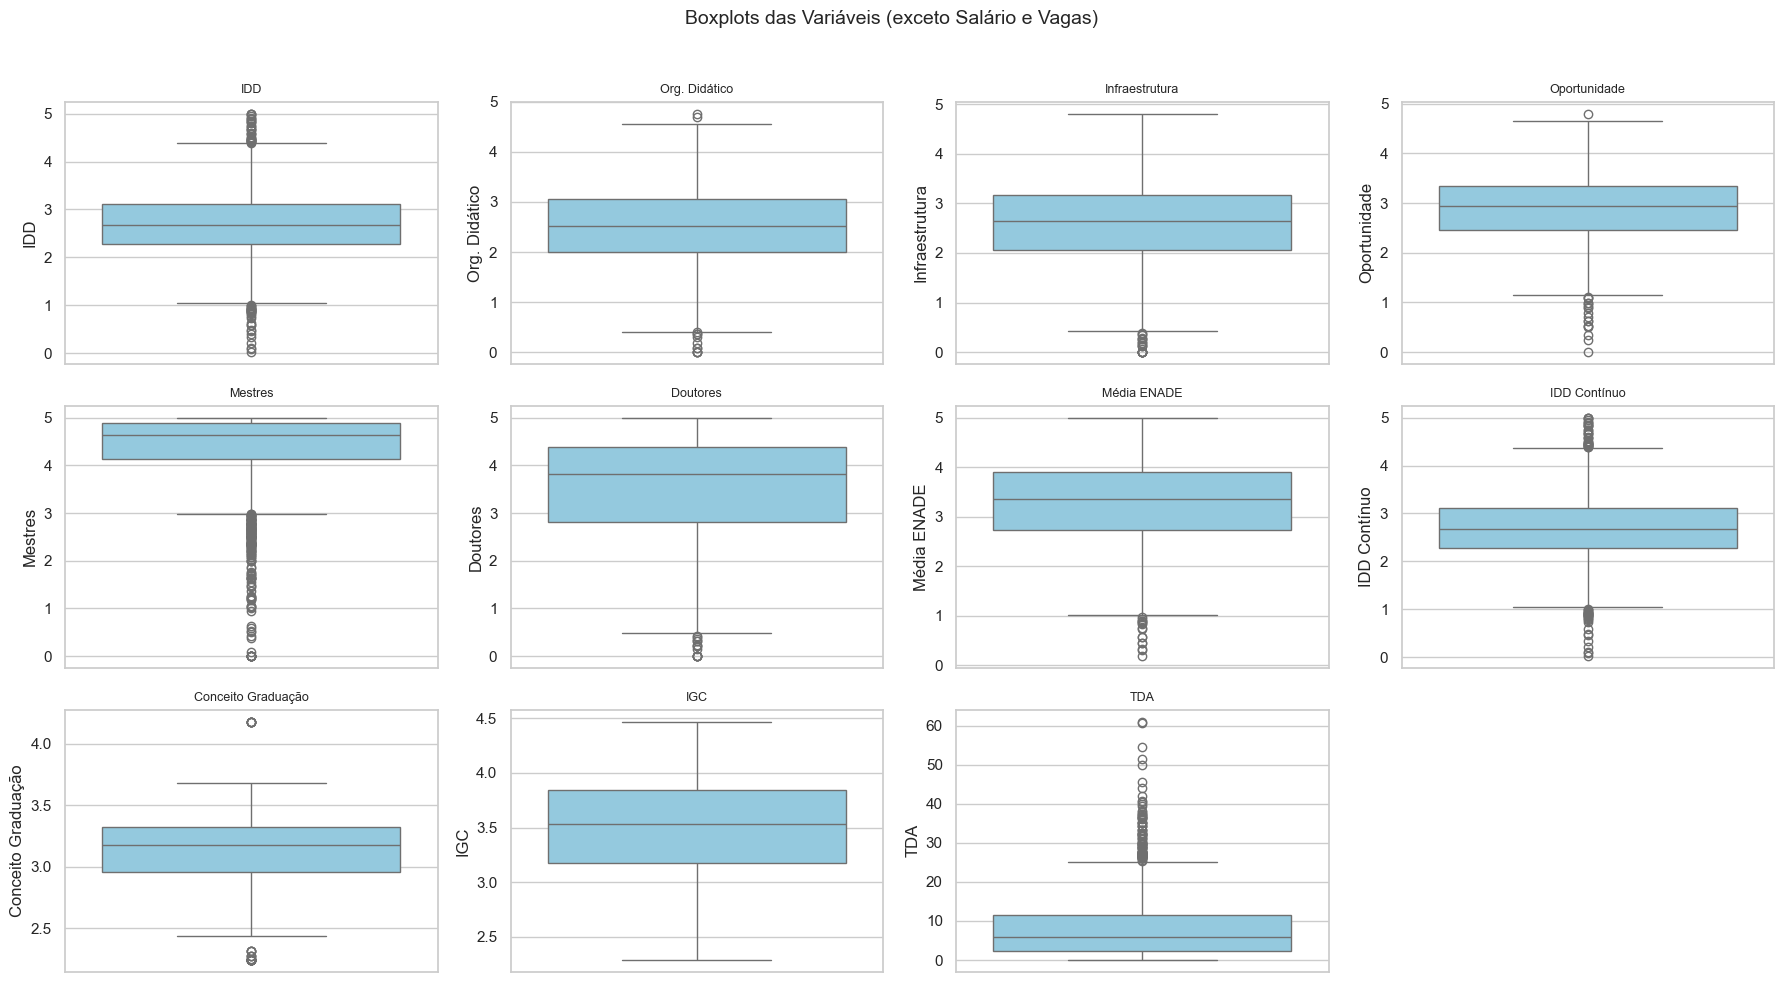

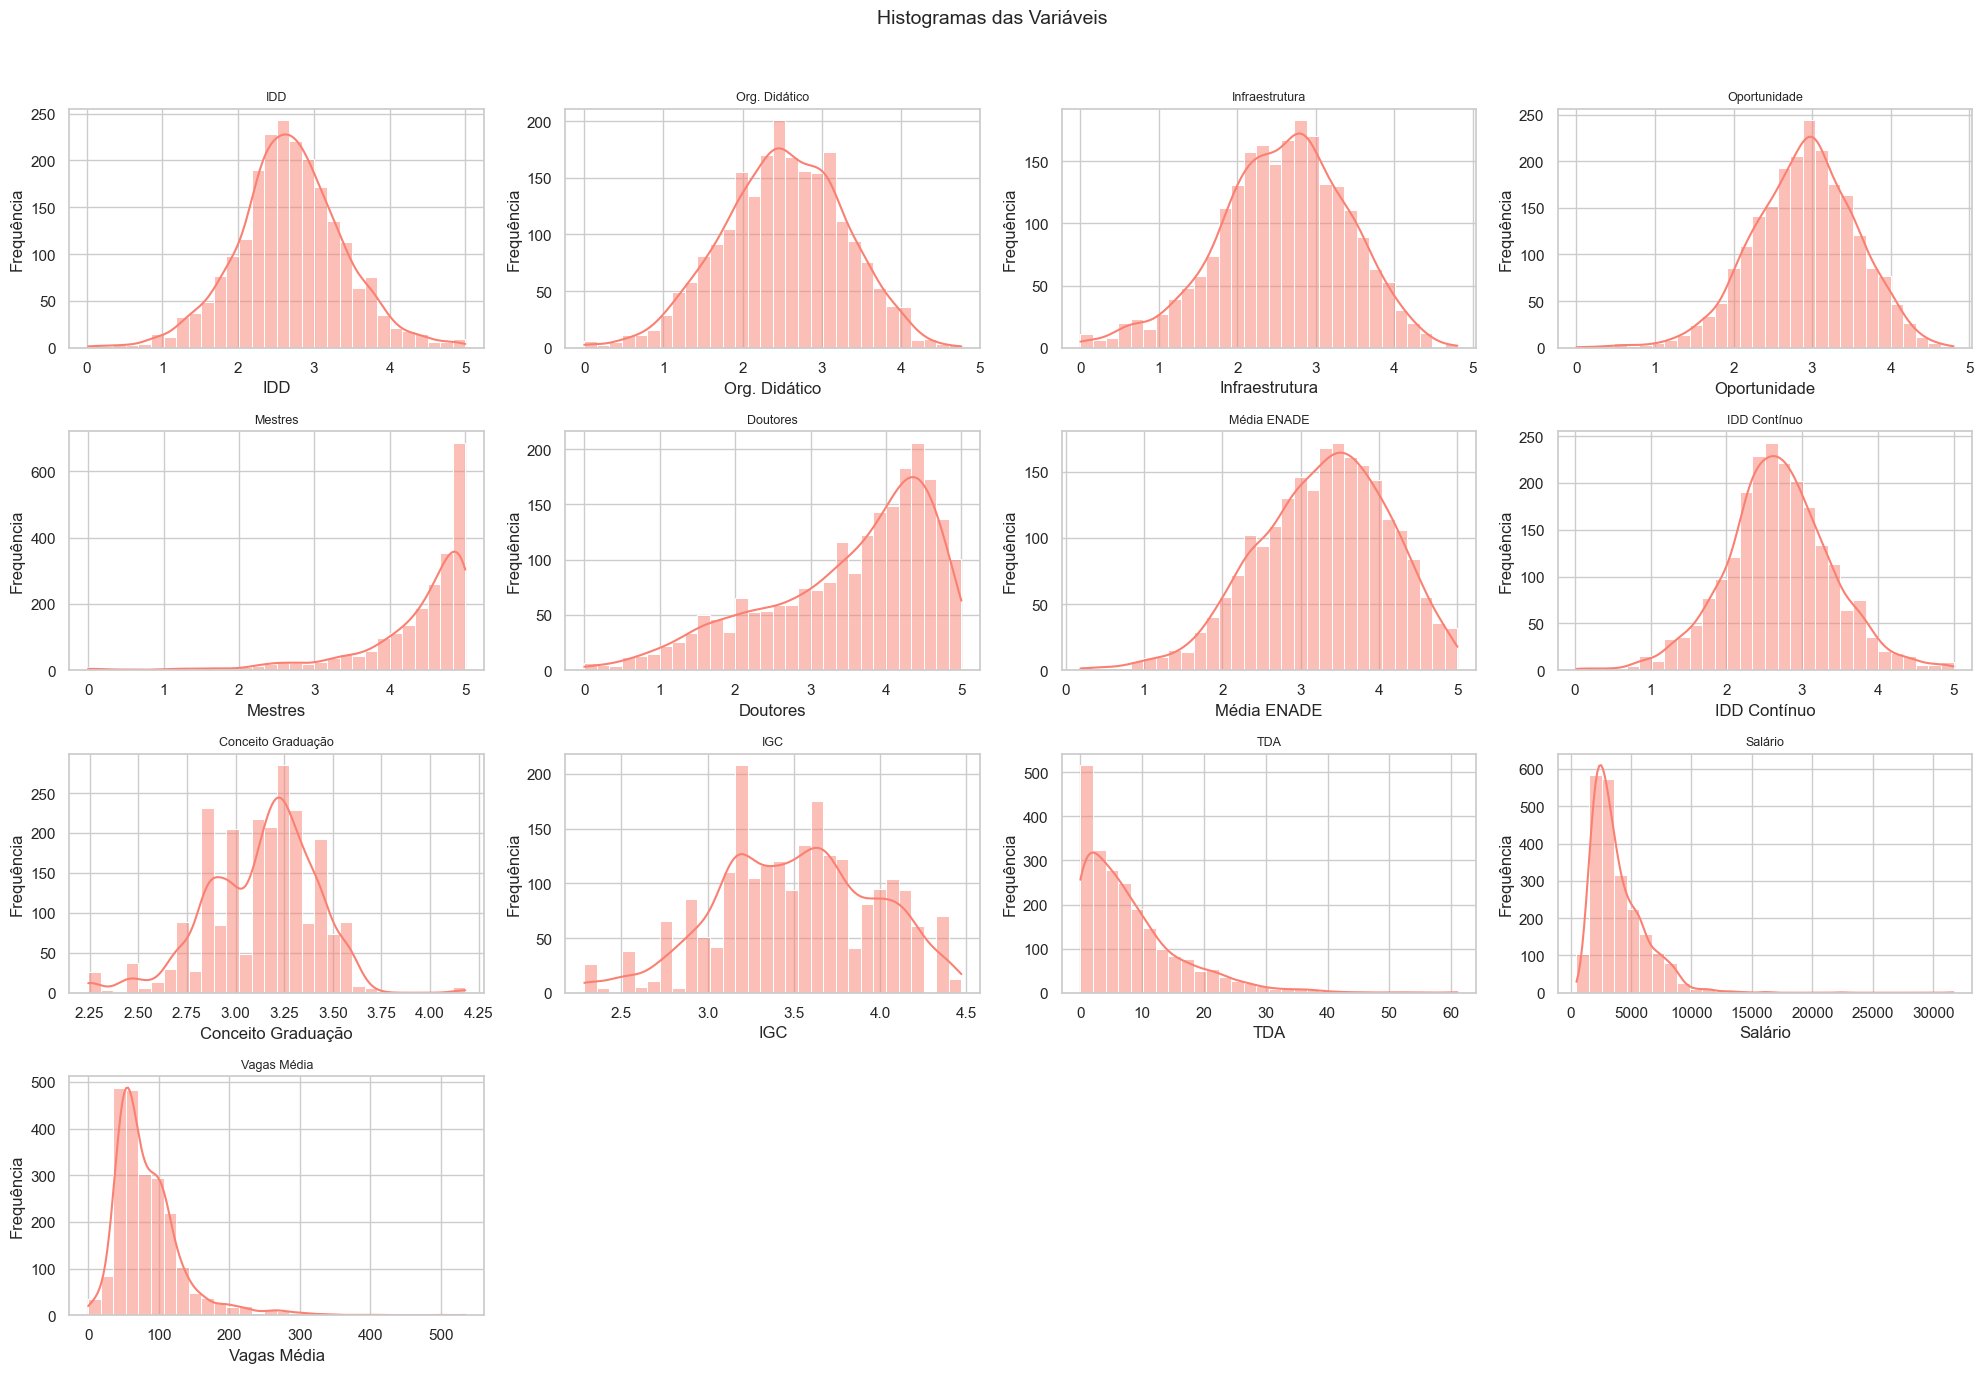

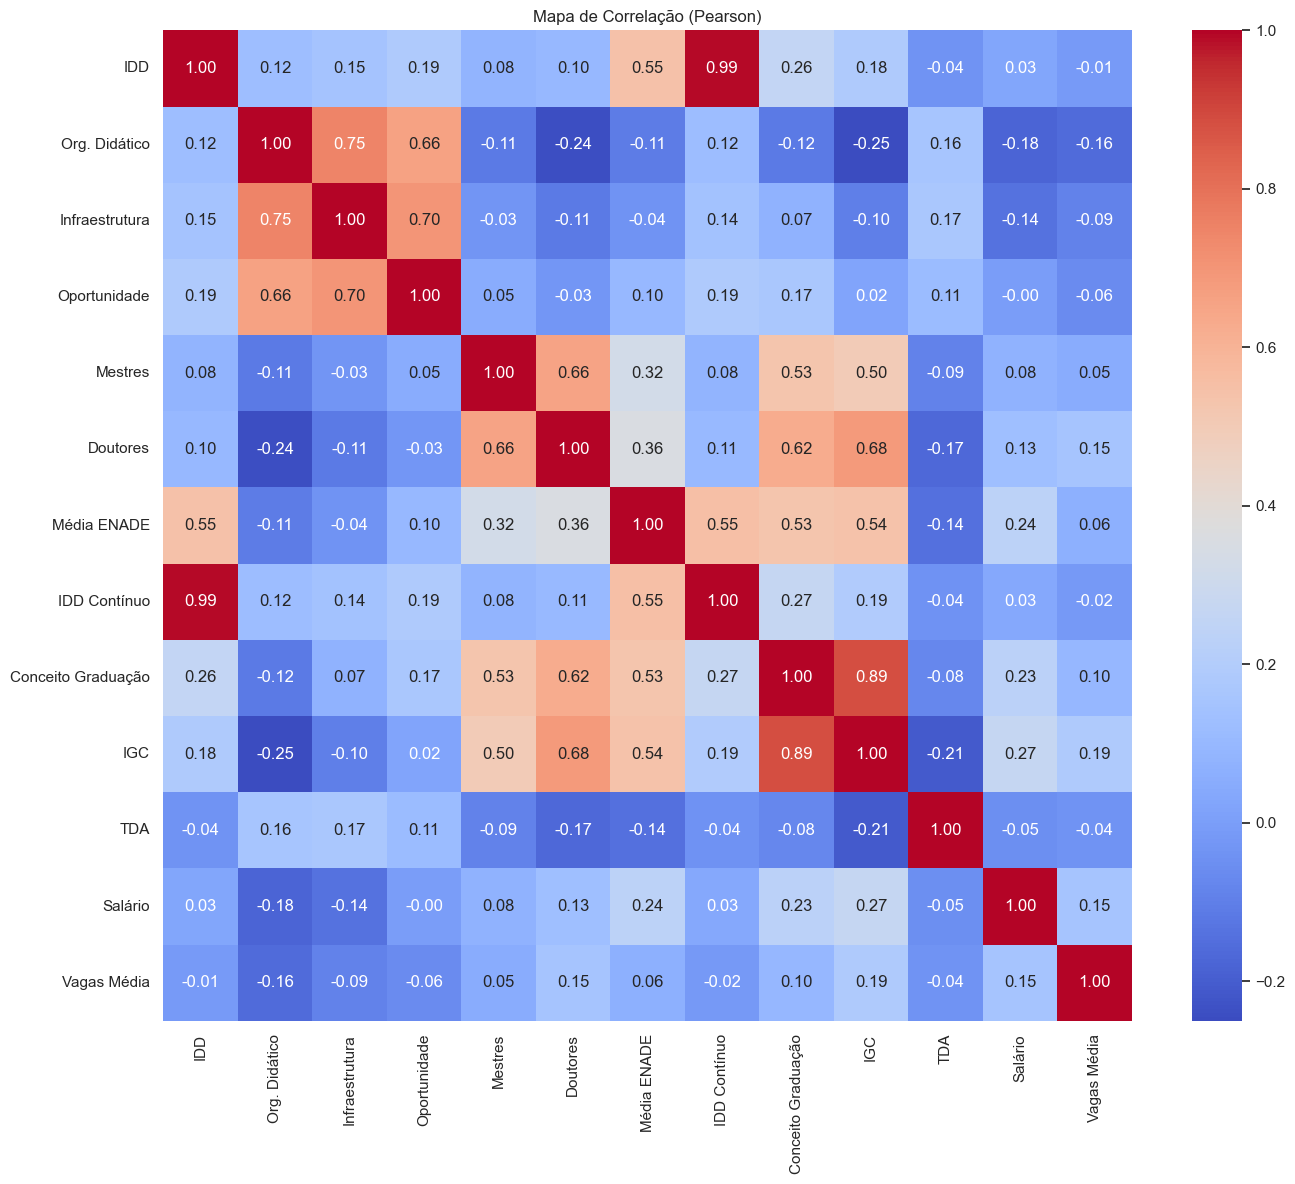

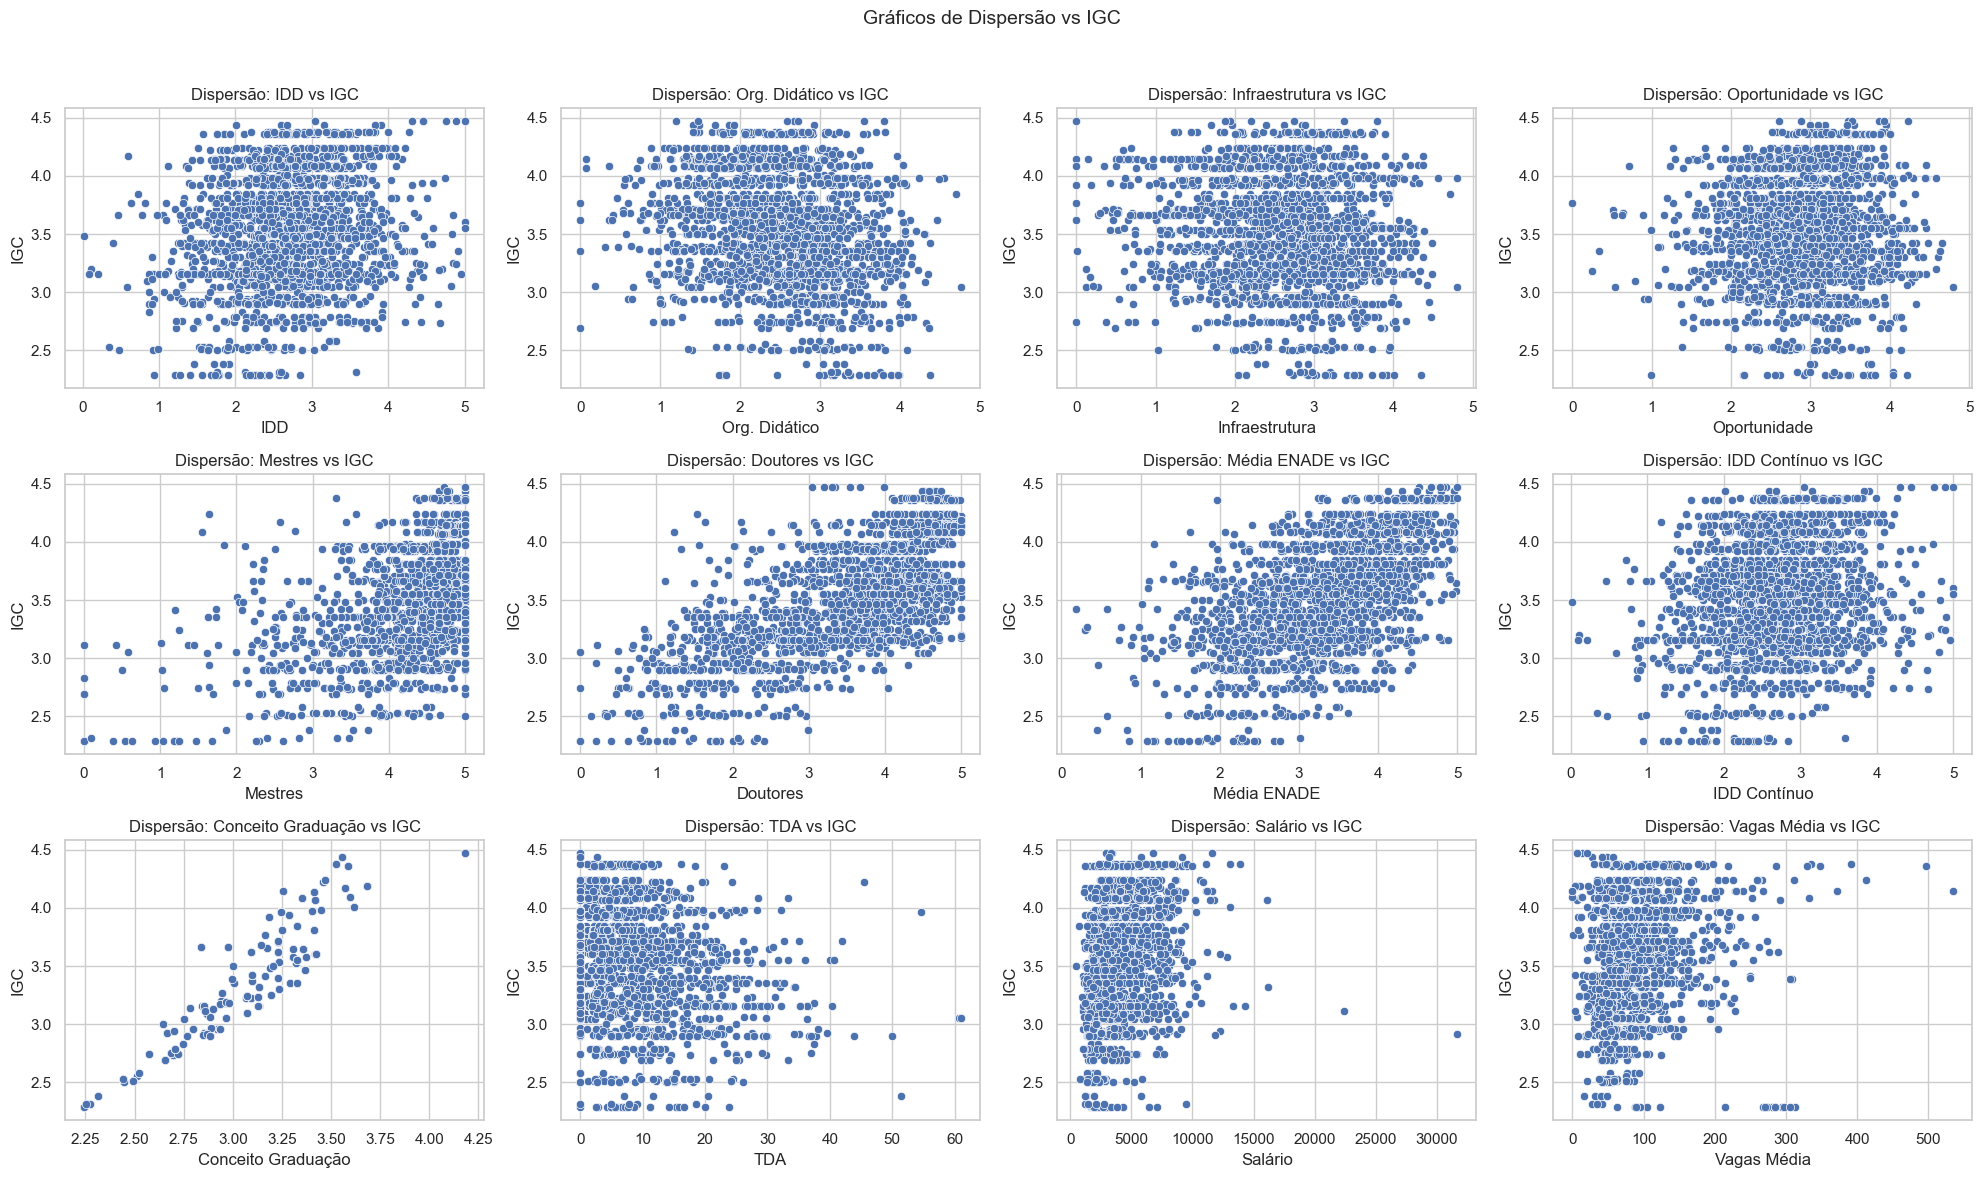

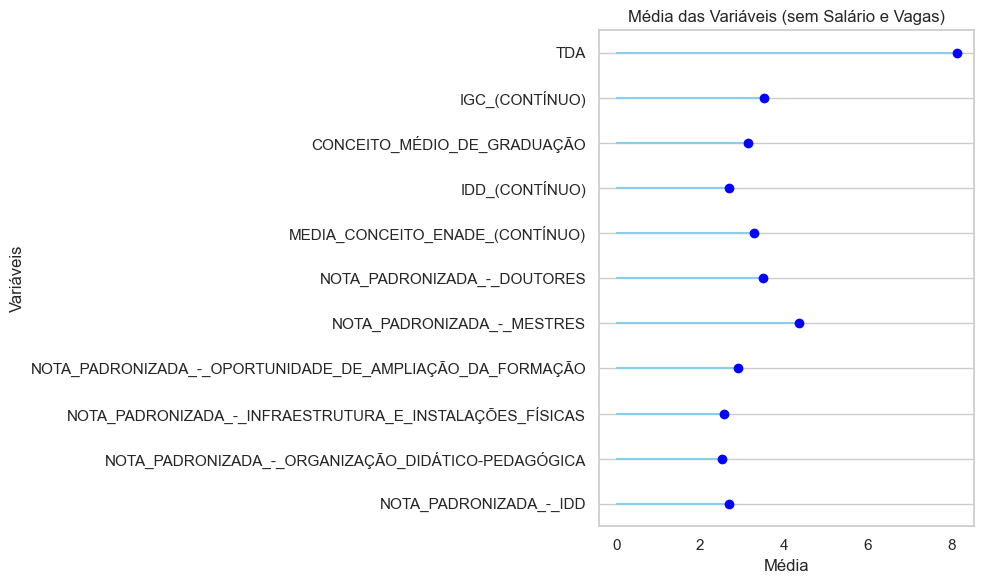

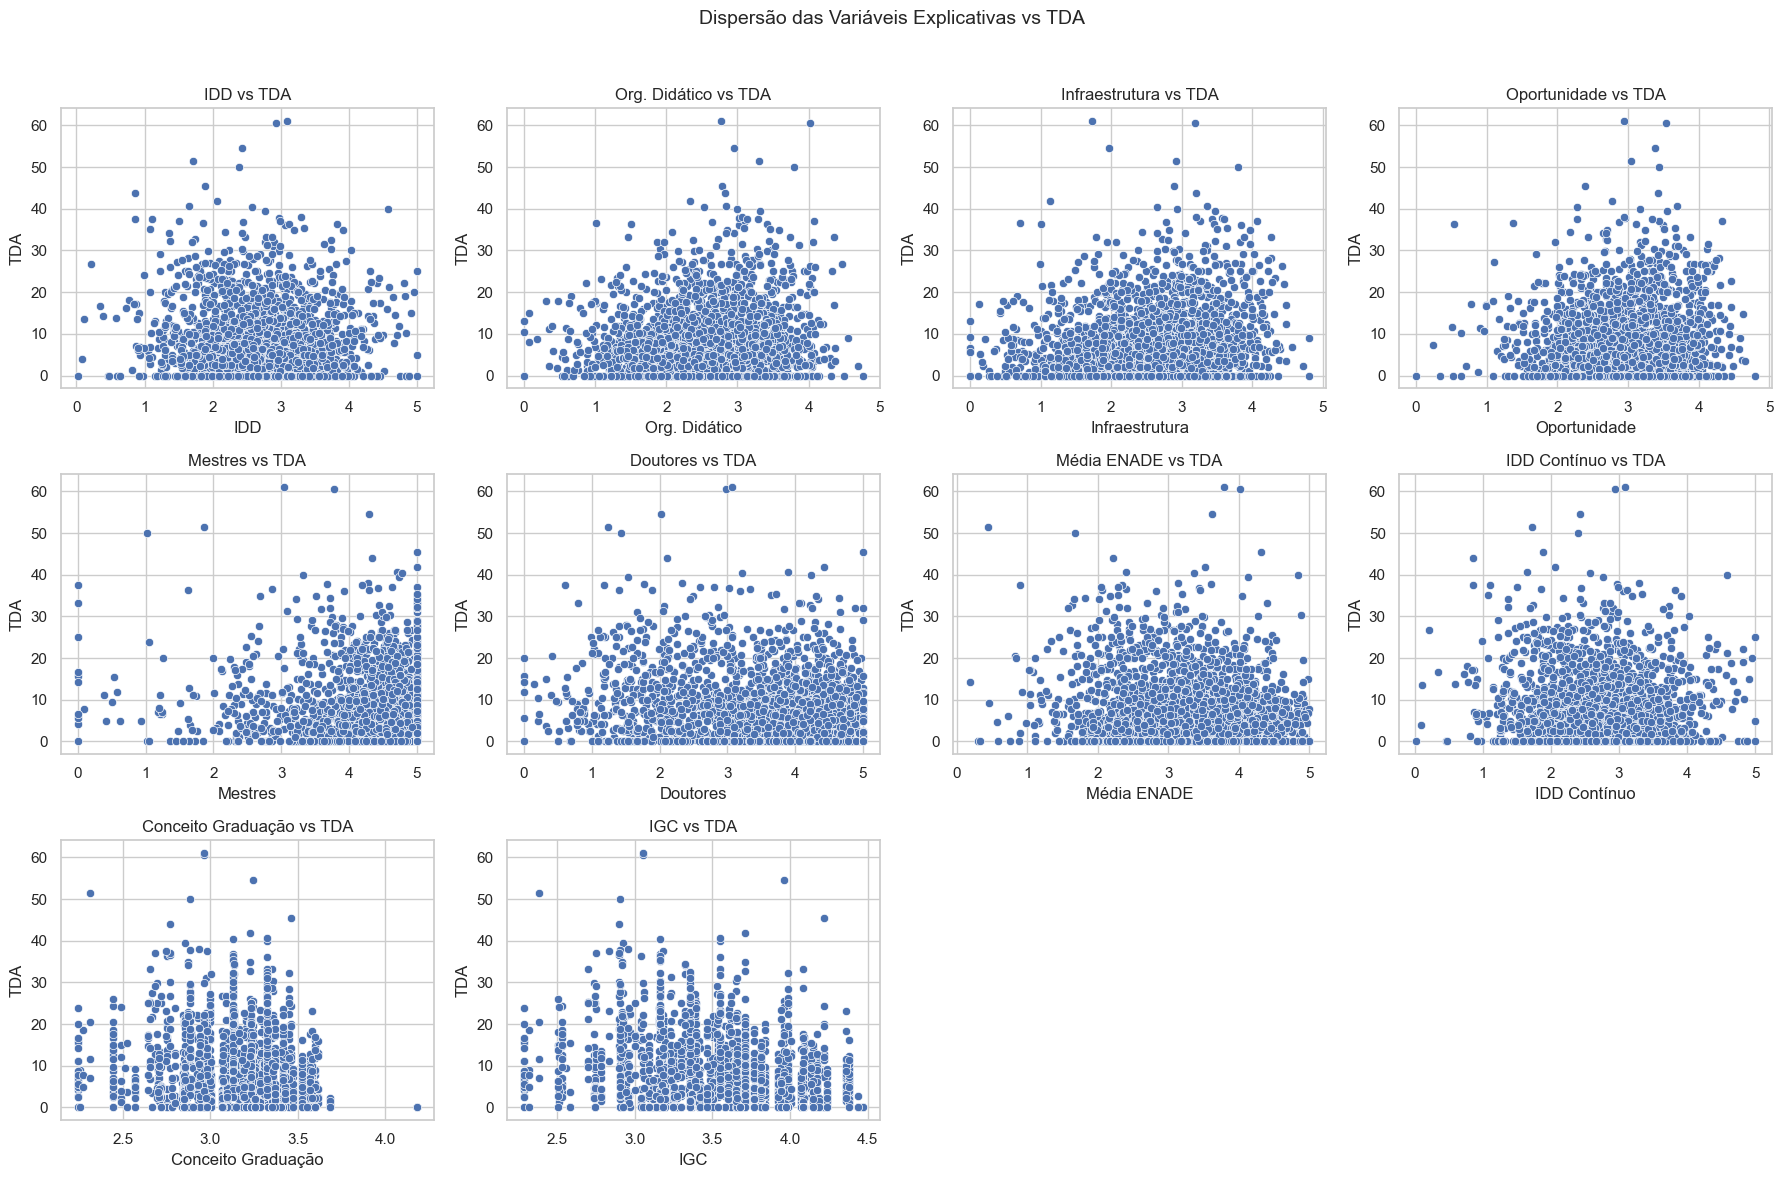

In [22]:
# 📦 Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# 📁 Leitura dos dados
caminho = r'C:/Users/john-/OneDrive - Universidade Federal da Paraíba/Área de Trabalho/Artigo - Estatística/projeto-evasao/data/processed/ml_iq_2018_2023.csv'
df = pd.read_csv(caminho)

# 🎯 Colunas quantitativas (excluindo SALARIO e QT_VG_TOTAL_MEDIA para boxplot)
colunas_quant_boxplot = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'TDA'
]

# Para os demais gráficos, incluindo SALARIO e QT_VG_TOTAL_MEDIA
colunas_quant_todas = colunas_quant_boxplot + ['SALARIO', 'QT_VG_TOTAL_MEDIA']

# Dicionário nomes curtos para as variáveis
nomes_curto = {
    'NOTA_PADRONIZADA_-_IDD': 'IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA': 'Org. Didático',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS': 'Infraestrutura',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO': 'Oportunidade',
    'NOTA_PADRONIZADA_-_MESTRES': 'Mestres',
    'NOTA_PADRONIZADA_-_DOUTORES': 'Doutores',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)': 'Média ENADE',
    'IDD_(CONTÍNUO)': 'IDD Contínuo',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO': 'Conceito Graduação',
    'IGC_(CONTÍNUO)': 'IGC',
    'TDA': 'TDA',
    'SALARIO': 'Salário',
    'QT_VG_TOTAL_MEDIA': 'Vagas Média'
}

# ----------------------------------
# 1. Estatísticas Descritivas (com TDA) - substituindo quantis por mediana
# ----------------------------------

desc_stats = df[colunas_quant_todas].agg(['mean', 'median', 'std', 'min', 'max']).T
desc_stats = desc_stats.rename(columns={
    'mean': 'Média',
    'median': 'Mediana',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    'max': 'Máximo'
})
desc_stats['Coeficiente de Variação'] = desc_stats['Desvio Padrão'] / desc_stats['Média']

print("### Estatísticas Descritivas Atualizada ###")
display(desc_stats)

# ----------------------------------
# 2. Correlação (Pearson) (com TDA)
# ----------------------------------
correlation_matrix = df[colunas_quant_todas].corr(method='pearson')
print("### Matriz de Correlação (Pearson) ###")
display(correlation_matrix)

# ----------------------------------
# 3. Ranking por variável TDA
# ----------------------------------
ranking_tda = df[['NOME_DA_IES', 'TDA']].groupby('NOME_DA_IES').mean().sort_values(by='TDA', ascending=False)
print("### Ranking TDA por IES ###")
display(ranking_tda)

# ----------------------------------
# 4. Boxplot Geral Agrupado (SEM SALARIO e QT_VG_TOTAL_MEDIA)
# ----------------------------------
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18, 10))
axs = axs.flatten()
for i, col in enumerate(colunas_quant_boxplot):
    sns.boxplot(data=df, y=col, ax=axs[i], color='skyblue')
    axs[i].set_title(nomes_curto[col], fontsize=9)
    axs[i].set_ylabel(nomes_curto[col])
    axs[i].set_xlabel('')
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
plt.suptitle("Boxplots das Variáveis (exceto Salário e Vagas)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ----------------------------------
# 5. Histogramas Agrupados (incluindo todas as variáveis)
# ----------------------------------
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 14))
axs = axs.flatten()
for i, col in enumerate(colunas_quant_todas):
    sns.histplot(df[col], kde=True, bins=30, ax=axs[i], color='salmon')
    axs[i].set_title(nomes_curto[col], fontsize=9)
    axs[i].set_xlabel(nomes_curto[col])
    axs[i].set_ylabel('Frequência')
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
plt.suptitle("Histogramas das Variáveis", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ----------------------------------
# 6. Heatmap de Correlação com nomes curtos nos eixos
# ----------------------------------
labels_curto = [nomes_curto[col] for col in correlation_matrix.columns]

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            xticklabels=labels_curto,
            yticklabels=labels_curto)
plt.title("Mapa de Correlação (Pearson)")
plt.tight_layout()
plt.show()

# ----------------------------------
# 7. Dispersão vs IGC (excluindo IGC)
# ----------------------------------
vars_disp = [col for col in colunas_quant_todas if col != 'IGC_(CONTÍNUO)']

n = len(vars_disp)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))
axs = axs.flatten()

for i, col in enumerate(vars_disp):
    sns.scatterplot(data=df, x=col, y='IGC_(CONTÍNUO)', ax=axs[i])
    axs[i].set_title(f'Dispersão: {nomes_curto[col]} vs IGC')
    axs[i].set_xlabel(nomes_curto[col])
    axs[i].set_ylabel('IGC')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Gráficos de Dispersão vs IGC", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ----------------------------------
# 8. Gráfico de Linhas Horizontal: variáveis no eixo Y, médias no eixo X
# ----------------------------------
media_vars = df[colunas_quant_boxplot].mean()

plt.figure(figsize=(10, 6))
plt.hlines(y=media_vars.index, xmin=0, xmax=media_vars.values, color='skyblue')
plt.plot(media_vars.values, media_vars.index, "o", color='blue')
plt.xlabel('Média')
plt.ylabel('Variáveis')
plt.title('Média das Variáveis (sem Salário e Vagas)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# ----------------------------------
# 9. Dispersão de variáveis explicativas vs TDA
# ----------------------------------
vars_exp = [col for col in colunas_quant_boxplot if col != 'TDA']

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axs = axs.flatten()

for i, col in enumerate(vars_exp):
    sns.scatterplot(data=df, x=col, y='TDA', ax=axs[i])
    axs[i].set_title(f'{nomes_curto.get(col, col)} vs TDA')
    axs[i].set_xlabel(nomes_curto.get(col, col))
    axs[i].set_ylabel('TDA')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Dispersão das Variáveis Explicativas vs TDA", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


